# Linear Models
https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if $\hat{y}$  is the predicted value.
$$\hat{f}(x,w) =w_0+ w_1x_1+ \ldots + w_px_p$$

Across the module, we designate the vector $w=(w_1, \ldots, w_p)$  as coef_ and $w_0$ as intercept_.

## Ordinary Least Squares/Linear Regression

The **target/dependent variable** must be a continous variable. For example utility bills could be 100 dollar, 100.04 dollar, or 100.05 dollars etc.


LinearRegression fits a linear model with coefficients $w=(w_1, \ldots, w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
$$\min_{w}||XW-Y||_2^2$$

 https://en.wikipedia.org/wiki/Ordinary_least_squares
 

You need to summarize your own answer for linear regression. For examfple https://intellipaat.com/blog/interview-question/data-science-interview-questions/#3

LinearRegression will take in its fit method arrays X, y and will store the coefficients  of the linear model in its coef_ member:

In [2]:
# import the model we need
from sklearn import linear_model
# Generate a model object
reg = linear_model.LinearRegression()
# we fit the model on the features(X) and label(y)
# X = [[0, 0], [1, 1], [2, 2]] first parameter
# y= [0, 1, 2], 2nd parameter
#model.fit(X,y)
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
# Get the coefficient
print(f" intercep = {reg.intercept_} and coefficient = {reg.coef_}")
# y= 0.5*x1+0.5x2+2.220446049250313e-16

 intercep = 2.220446049250313e-16 and coefficient = [0.5 0.5]


The coefficient estimates for Ordinary Least Squares rely on the independence of the features. When features are correlated and the columns of the design matrix  have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

## Linear Regression Example

https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets

The example below uses only the first feature of the diabetes dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), in order to illustrate the data points within the two-dimensional plot. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of determination are also calculated.

 The size of diabetes_X = (442, 10)
 The size of diabetes_X = (442, 1)
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


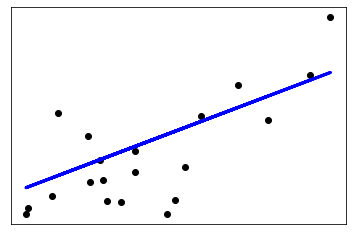

In [2]:
# Code source: Jaques Grobler
# License: BSD 3 clause

# visulize the data
import matplotlib.pyplot as plt
import numpy as np
# import the linear model
from sklearn import datasets, linear_model
# Evaluate our model performance
# regression using mean squared error = mean of the square of the difference between true target and predicted target
# the smaller of MSE, the better
# The second metric for linear regression is the R squared, the percentage of variable explained.
# the larger of R^2, the better. 0<=R^2<=1
# https://en.wikipedia.org/wiki/Coefficient_of_determination
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset, we always split the data into features/predictors into X and target/lable is a column vector
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

#check the size of the feature matrix
print(" The size of diabetes_X = {}".format(diabetes_X.shape))
# Use only one feature from 3rd column (indexed by 2)
diabetes_X = diabetes_X[:, np.newaxis, 2]
print(" The size of diabetes_X = {}".format(diabetes_X.shape))
# Split the data into training/testing sets to avoid overfiting the dataset
# one simple approach, we use the last 20 observation as the test dataset; others as the training dataset
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# do the samethng to the lable/target
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set to evaluate our model
# model.preditct(test dataset's featurex (X)
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

# Evaluate the model performance on the test dataset; for regression, we typically look at MSE and R^2
# The mean squared error using mean_squared_error(true label y_test, predicted y_label
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
# r2_score(true label y_test, predicted y_label)
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs since it is in 2 dimensional space y =b0+b1*x
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

When we look at the MSE, care must be taken. For example, when we forecast the buget of Missouri. The true budget is about 50 billions, if the MSE is 1 million. 1 million/(50 billion) = 1 million (50*1000) million = 0.002%. It is a very good model


## Non-Negative Least Squares
It is possible to constrain all the coefficients to be non-negative, which may be useful when they represent **some physical or naturally non-negative quantities (e.g., frequency counts or prices of goods)**. LinearRegression accepts a boolean positive parameter: when set to True Non-Negative Least Squares are then applied.

In this example, we fit a linear model with **positive constraints on the regression coefficients and compare the estimated coefficients to a classic linear regression**.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Generate some **random data**

In [4]:
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

Split the data in train set and test set using train_test_split, which is a better approach than simple split before

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [5]:
from sklearn.model_selection import train_test_split

#train_test_split(featurem matrix, label column, test size percentage)
# it returns four parts of training feature X_train, test feature X_test; training label y_train and test label: y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Fit the Non-Negative least squares.

In [6]:
from sklearn.linear_model import LinearRegression

# set positive=True and gurantee the coefficient is positive
reg_nnls = LinearRegression(positive=True)
# note here, we typical do prediction first using  reg_nnls.fit(X_train, y_train)
# then predict using reg_nnls.predict(X_test)
#chain them together using on line of code

y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
#evaluate our model
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196525


Fit an OLS.

In [7]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7436926291700352


Comparing the regression coefficients between OLS and NNLS, we can observe they are highly correlated (the dashed line is the identity relation), but the non-negative constraint shrinks some to 0. The Non-Negative Least squares inherently yield sparse results.

Text(0, 0.5, 'NNLS regression coefficients')

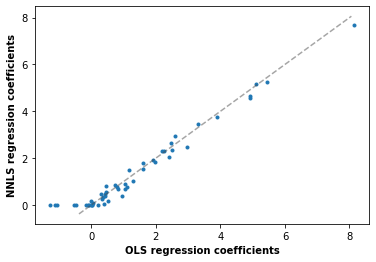

In [8]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

## Ridge regression and classification

https://en.wikipedia.org/wiki/Ridge_regression


### Regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:
$$\min_w||XW-Y||_2^2+\alpha||W||_2^2$$
The complexity parameter $\alpha \ge 0$ controls the amount of shrinkage: the larger the value of , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

For example if $\alpha$= 1 trillion, since we want to find the minimum, it will force the coefficient to zero. On the other hand if $\alpha=0$, it becomes the OLS.

As with other linear models, Ridge will take in its fit method arrays X, y and will store the coefficients  of the linear model in its coef_ member:

In [9]:
# import the library
from sklearn import linear_model
# Create a ridge model object by specifying alpha
reg = linear_model.Ridge(alpha=.5)
# the rest part is exctly the same as OLS
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

reg.coef_

reg.intercept_

# we can also evaluate our model performance using r2_score, MSE etc

0.1363636363636364

## Lasso
https://en.wikipedia.org/wiki/Lasso_(statistics)

The Lasso is a linear model that estimates **sparse coefficients**(close to zeros). It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason, Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients (see Compressive sensing: tomography reconstruction with L1 prior (Lasso)).

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

$$ \min_w\frac{1}{n_{sample}}||XW-y||_2^2+\alpha||w||_1$$
 
 The first part is MSE, the second part, we use absolute values|| instead of squares, that is used in the ridge regression.
The lasso estimate thus solves the minimization of the least-squares penalty with$\alpha||w||_1$  added, where$\alpha$  is a constant and $||w||_1$  is the $l_1$ -norm of the coefficient vector. The abosulute values may help force some coefficients to be zeros.

The larger the $\alpha$, the quick of some coefficient to get zero. If $\alpha=0$, it becomes OLS.

The implementation in the class Lasso uses coordinate descent as the algorithm to fit the coefficients. See Least Angle Regression for another implementation:

In [3]:
from sklearn import linear_model
# the only difference between lasso and OLS is the following line of code
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

reg.predict([[1, 1]])


array([0.8])

## Least Angle Regression

https://en.wikipedia.org/wiki/Least-angle_regression

Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

The advantages of LARS are:

+ It is numerically efficient in contexts where the number of features is significantly greater than the number of samples.

+ It is computationally just as fast as forward selection and has the same order of complexity as ordinary least squares.

+ It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.

+ If two features are almost equally correlated with the target, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.

+ It is easily modified to produce solutions for other estimators, like the Lasso.

The disadvantages of the LARS method include:

+ Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article.

The LARS model can be used via the estimator Lars, or its low-level implementation lars_path or lars_path_gram.

## LARS Lasso
LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.

In [11]:
from sklearn import linear_model
# the only difference is the LARS Lasso model
reg = linear_model.LassoLars(alpha=.1, normalize=False)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.coef_

array([0.6, 0. ])

## Setting regularization parameter
We need to select the alpha parameter first, then estimate the cofficient. Classical example for hyper parameter is the $\alpha$ in ridge and lasso regression.


https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)

The alpha parameter controls the degree of sparsity of the estimated coefficients.
+ Using cross-validation
+ Information-criteria based model selection

https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification


# stop here 8/31

## Lasso model selection: AIC-BIC and  cross-validation

There are two classical approach to select hyperparamerters such as $\alpha$ in ridge and lasso regression

+ AIC/BIC: information creteira; heavily based on statistics. We need to know two key formula in the following wikipedia site.
$$
AIC = 2k -2\ln(L) = 2* \text{number of parameters}-2*\ln(\text{Likelihood estimation})
$$
$$
BIC = k*\ln(n) -2\ln(L) = \ln(\text{number of observations})* \text{number of parameters}-2*\ln(\text{Likelihood estimation})
$$
BIC put a heavey penalty on the number of parameters
When we increase the number of parameters, the Likelihood function increases too.
+ CV: cross-validation approach: There is no stat involved at all

When we increase the number of paramter, it will make $2k$ larger, and the Likelihood estimation increases too. Then $\ln(\text{Likelihood estimation}$ increase too.
but $-2*\ln(\text{Likelihood estimation}$ decrease. it strikes a balance between the first term and second number.

Our goal is to find the optimal $k$ to minimize the AIC/BIC.


https://en.wikipedia.org/wiki/Akaike_information_criterion

https://en.wikipedia.org/wiki/Bayesian_information_criterion



This example focuses on model selection for Lasso models that are linear models with an L1 penalty for regression problems.

Indeed, several strategies can be used to select the value of the regularization parameter: via cross-validation or using an information criterion, namely AIC or BIC.

In what follows, we will discuss in details the different strategies.


Which one is better AIC or BIC

https://stats.stackexchange.com/questions/577/is-there-any-reason-to-prefer-the-aic-or-bic-over-the-other

In [1]:
# Author: Olivier Grisel
#         Gael Varoquaux
#         Alexandre Gramfort
#         Guillaume Lemaitre
# License: BSD 3 clause

#### Dataset

In this example, we will use the diabetes dataset.

In [13]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In addition, we add some random features to the original data to better illustrate the feature selection performed by the Lasso model.

In [14]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(42)
n_random_features = 14
X_random = pd.DataFrame(
    rng.randn(X.shape[0], n_random_features),
    columns=[f"random_{i:02d}" for i in range(n_random_features)],
)
X = pd.concat([X, X_random], axis=1)
# Show only a subset of the columns
X[X.columns[::3]].head()

,age,bp,s3,s6,random_02,random_05,random_08,random_11
0,0.038076,0.021872,-0.043401,-0.017646,0.647689,-0.234137,-0.469474,-0.465730
1,-0.001882,-0.026328,0.074412,-0.092204,-1.012831,-1.412304,0.067528,0.110923
2,0.085299,-0.005671,-0.032356,-0.025930,-0.601707,-1.057711,0.208864,0.196861
3,-0.089063,-0.036656,-0.036038,-0.009362,-1.478522,1.057122,0.324084,0.611676
4,0.005383,0.021872,0.008142,-0.046641,0.331263,-0.185659,0.812526,1.003533


## Selecting Lasso via an information criterion

The $\alpha$ in the Lasso algorithm cannot estimate from data at all, which is called hyperparameters. The user need to select mannualy.
But for the weights $W$, which is estimated from data

LassoLarsIC provides a Lasso estimator that uses the Akaike information criterion (AIC) or the Bayes information criterion (BIC) to select the optimal value of the regularization parameter alpha.

Before fitting the model, we will standardize the data with a StandardScaler. In addition, we will measure the time to fit and tune the hyperparameter alpha in order to compare with the cross-validation strategy.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsIC.html


We will first fit a Lasso model with the AIC criterion.

In [15]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

#time the codes
start_time = time.time()
lasso_lars_ic = make_pipeline(
    StandardScaler(), LassoLarsIC(criterion="aic", normalize=False)
).fit(X, y)
fit_time = time.time() - start_time

We store the AIC metric for each value of alpha used during fit.

In [16]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

Now, we perform the same analysis using the BIC criterion.

In [17]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

We can check which value of alpha leads to the minimum AIC and BIC.

In [18]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


In [19]:
results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
45.16003002046289,442.000000,442.000000
42.300447976855814,425.358090,429.449400
21.542302256518873,290.745663,298.928283
15.034109542941795,263.536975,275.810905
6.189693385716014,238.313800,254.679040
5.329589710548937,236.918474,257.375023
4.30592980778084,234.634409,259.182268
4.124324661267887,235.934699,264.573868
3.8206559838059198,236.721633,269.452112


Finally, we can plot the AIC and BIC values for the different alpha values. The vertical lines in the plot correspond to the alpha chosen for each criterion. The selected alpha corresponds to the minimum of the AIC or BIC criterion.

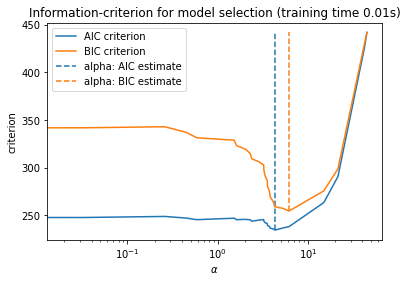

In [20]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
#set log scale since alpha is from 0 to 45.3
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

Model selection with an information-criterion is very fast. It relies on computing the criterion on the in-sample set provided to fit. Both criteria estimate the model generalization error based on the training set error and penalize this overly optimistic error. However, this penalty relies on a proper estimation of the degrees of freedom and the noise variance. Both are derived for large samples (asymptotic results) and assume the model is correct, i.e. that the data are actually generated by this model.

These models also tend to break when the problem is badly conditioned (more features than samples). It is then required to provide an estimate of the noise variance.

**Cross Validation (CV)** is a very simple approach to apply without any probability and stats at all.
Simple validation approach: We split the data into a training dataset and test data set. we fit our model on training dataset and evaluate our model on "unseen" dataset. Since there is only one test dataset, there maybe some noises

**K fold CV** address the shortcomings of the simple validation approach. We divide the whole data set into k fold, we train the model on (k-1) folders and evaluate using the remaining fold. We obtained k test errors, finally we average them.

**Leave One Out Cross Validation (LOOCV)**

**Repeated k-fold CV**


## Selecting Lasso via cross-validation


https://en.wikipedia.org/wiki/Cross-validation_(statistics)


The Lasso estimator can be implemented with different solvers: coordinate descent and least angle regression. They differ with regards to their execution speed and sources of numerical errors.

In scikit-learn, two different estimators are available with integrated cross-validation: LassoCV and LassoLarsCV that respectively solve the problem with coordinate descent and least angle regression.

In the remainder of this section, we will present both approaches. For both algorithms, we will use a 20-fold cross-validation strategy.


### Lasso via coordinate descent
Let’s start by making the hyperparameter tuning using LassoCV.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

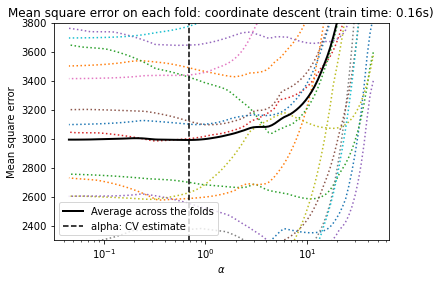

In [21]:
#library for lasso CV
from sklearn.linear_model import LassoCV

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time
import matplotlib.pyplot as plt

ymin, ymax = 2300, 3800
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

## Lasso via least angle regression
Let’s start by making the hyperparameter tuning using LassoLarsCV.

In [22]:
from sklearn.linear_model import LassoLarsCV

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoLarsCV(cv=20, normalize=False)).fit(X, y)
fit_time = time.time() - start_time

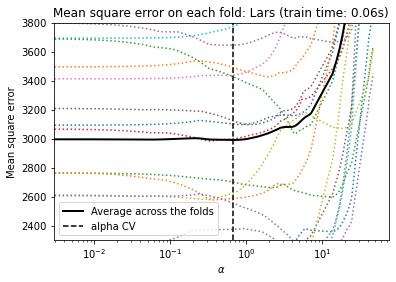

In [23]:
lasso = model[-1]
plt.semilogx(lasso.cv_alphas_, lasso.mse_path_, ":")
plt.semilogx(
    lasso.cv_alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha CV")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(f"Mean square error on each fold: Lars (train time: {fit_time:.2f}s)")

### Summary of cross-validation approach

Both algorithms give roughly the same results.

Lars computes a solution path only for each kink in the path. As a result, it is very efficient when there are only of few kinks, which is the case if there are few features or samples. Also, it is able to compute the full path without setting any hyperparameter. On the opposite, coordinate descent computes the path points on a pre-specified grid (here we use the default). Thus it is more efficient if the number of grid points is smaller than the number of kinks in the path. Such a strategy can be interesting if the number of features is really large and there are enough samples to be selected in each of the cross-validation fold. In terms of numerical errors, for heavily correlated variables, Lars will accumulate more errors, while the coordinate descent algorithm will only sample the path on a grid.

Note how the optimal value of alpha varies for each fold. This illustrates why nested-cross validation is a good strategy when trying to evaluate the performance of a method for which a parameter is chosen by cross-validation: this choice of parameter may not be optimal for a final evaluation on unseen test set only.

## Conclusion
In this tutorial, we presented two approaches for selecting the best hyperparameter alpha: one strategy finds the optimal value of alpha by only using the training set and some information criterion, and another strategy is based on cross-validation.

In this example, both approaches are working similarly. The in-sample hyperparameter selection even shows its efficacy in terms of computational performance. However, it can only be used when the number of samples is large enough compared to the number of features.

That’s why hyperparameter optimization via cross-validation is a safe strategy: it works in different settings.